# Experiment 6 : Grow of stables attractors fields in Linear CBN

This experiment explore the grow of stable attractor fields in CBN with Linear topology and same local networks. Its important see what happened with the Linear CBN with more local networks and coupling signals.

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the database
df = pd.read_csv("outputs/exp6_linear_aleatory_3_9_1000/data.csv")

# show the column names
df.keys()

Index(['i_sample', 'n_local_networks', 'n_var_network', 'v_topology',
       'n_output_variables', 'n_clauses_function', 'n_local_attractors',
       'n_pair_attractors', 'n_attractor_fields', 'n_time_find_attractors',
       'n_time_find_pairs', 'n_time_find_fields'],
      dtype='object')

In [34]:
df[['n_attractor_fields','n_local_networks']]

,n_attractor_fields,n_local_networks
0,1,3
1,1,3
2,1,3
3,2,3
4,2,3
...,...,...
6995,1,9
6996,19683,9
6997,19683,9
6998,19683,9


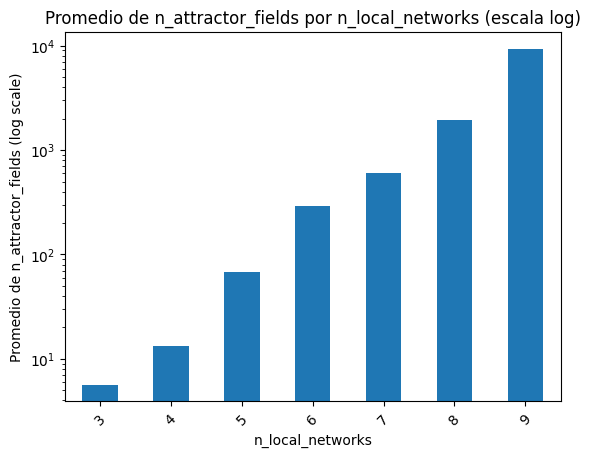

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Agrupar por 'n_local_networks' y calcular el promedio de 'n_attractor_fields'
grouped_data = df.groupby('n_local_networks')['n_attractor_fields'].mean()

# Crear el histograma con escala logarítmica en el eje y y colores diferentes
grouped_data.plot(kind='bar', logy=True)

# Personalizar el gráfico
plt.title('Promedio de n_attractor_fields por n_local_networks (escala log)')
plt.xlabel('n_local_networks')
plt.ylabel('Promedio de n_attractor_fields (log scale)')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mayor legibilidad

# Mostrar el gráfico
plt.show()

In [36]:
import pandas as pd
import numpy as np

# Suponiendo que tu DataFrame se llama df
# df = ...  # Aquí cargarías tu DataFrame

# Ordenar el DataFrame por 'n_local_networks'
df_sorted = df.sort_values('n_local_networks')

# Calcular la diferencia entre los valores consecutivos de 'n_local_networks'
df_sorted['diff_n_local_networks'] = df_sorted['n_local_networks'].diff()

# Calcular la diferencia entre los valores consecutivos de 'n_attractor_fields'
df_sorted['diff_n_attractor_fields'] = df_sorted['n_attractor_fields'].diff()

# Calcular la tasa de crecimiento por registro
df_sorted['growth_rate'] = np.where(df_sorted['diff_n_local_networks'] != 0, df_sorted['diff_n_attractor_fields'] / df_sorted['diff_n_local_networks'], np.nan)

# Eliminar las filas que contienen NaN
df_sorted = df_sorted.dropna(subset=['growth_rate'])

# Calcular el promedio de todas las tasas de crecimiento
average_growth_rate = df_sorted['growth_rate'].mean()

# Calcular el crecimiento promedio en función de porcentajes
average_growth_rate_percentage = (average_growth_rate / df['n_attractor_fields'].mean()) * 100

print("Crecimiento promedio en función de porcentajes:", average_growth_rate_percentage)



Crecimiento promedio en función de porcentajes: 5.6876235280735


In [37]:
import pandas as pd
import numpy as np

# Suponiendo que tu DataFrame se llama df
# df = ...  # Aquí cargarías tu DataFrame

# Ordenar el DataFrame por 'n_local_networks'
df_sorted = df.sort_values('n_local_networks')

# Calcular la diferencia entre los valores consecutivos de 'n_local_networks'
df_sorted['diff_n_local_networks'] = df_sorted['n_local_networks'].diff()

# Calcular la diferencia entre los valores consecutivos de 'n_attractor_fields'
df_sorted['diff_n_attractor_fields'] = df_sorted['n_attractor_fields'].diff()

# Calcular la tasa de crecimiento por registro
df_sorted['growth_rate'] = np.where(df_sorted['diff_n_local_networks'] != 0, df_sorted['diff_n_attractor_fields'] / df_sorted['diff_n_local_networks'], np.nan)

# Eliminar las filas que contienen NaN
df_sorted = df_sorted.dropna(subset=['growth_rate'])

# Calcular el promedio de todas las tasas de crecimiento
average_growth_rate = df_sorted['growth_rate'].mean()

# Calcular el crecimiento promedio en función de porcentajes
average_growth_rate_percentage = (average_growth_rate / df['n_attractor_fields'].mean()) * 100

print("Crecimiento promedio en función de porcentajes:", average_growth_rate_percentage)

# Calcular el crecimiento para cada cambio en 'n_local_networks'
growth_list = []

for index, row in df_sorted.iterrows():
    growth = (row['diff_n_attractor_fields'] / row['diff_n_local_networks']) * 100
    growth_list.append(growth)

print("\nLista de crecimientos para cada cambio en n_local_networks en porcentaje:")
print(growth_list)

Crecimiento promedio en función de porcentajes: 5.6876235280735

Lista de crecimientos para cada cambio en n_local_networks en porcentaje:
[-700.0, 3100.0, 0.0, 31900.0, 100.0, 25600.0]


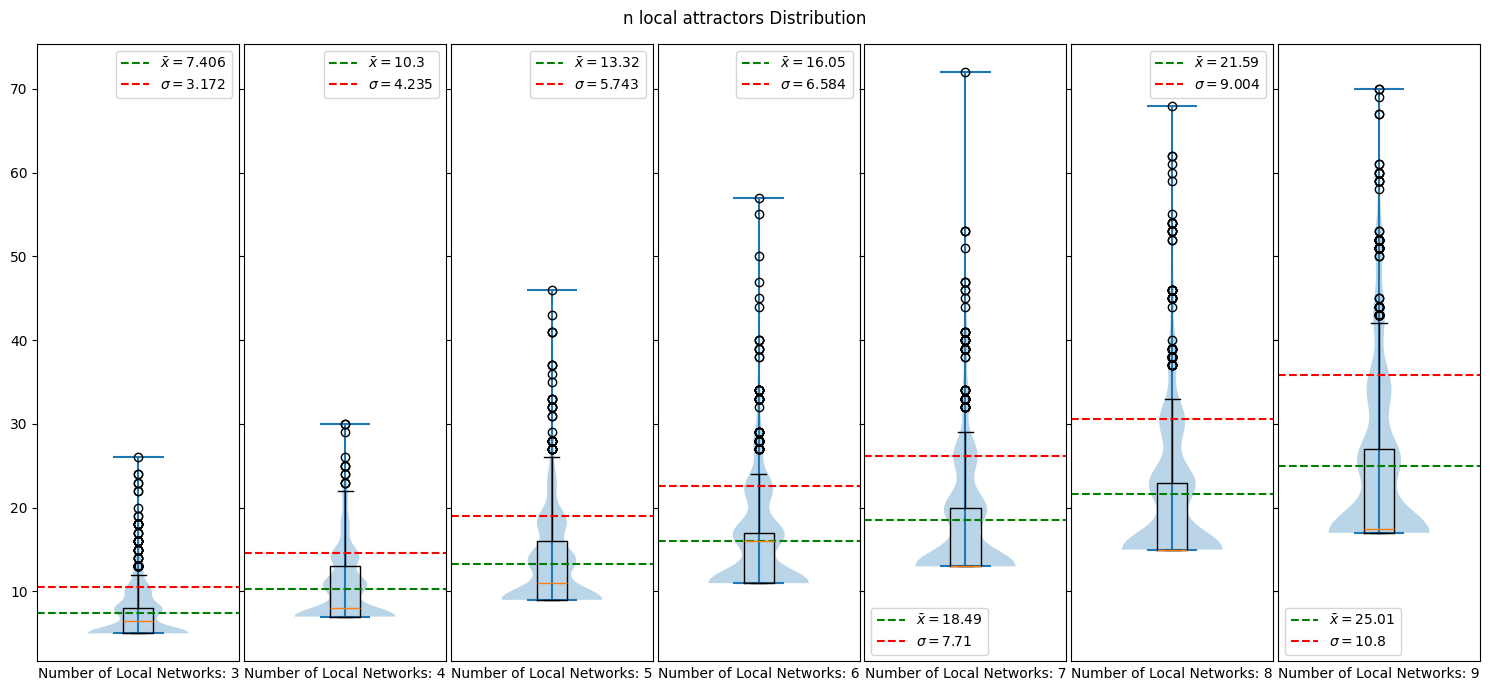

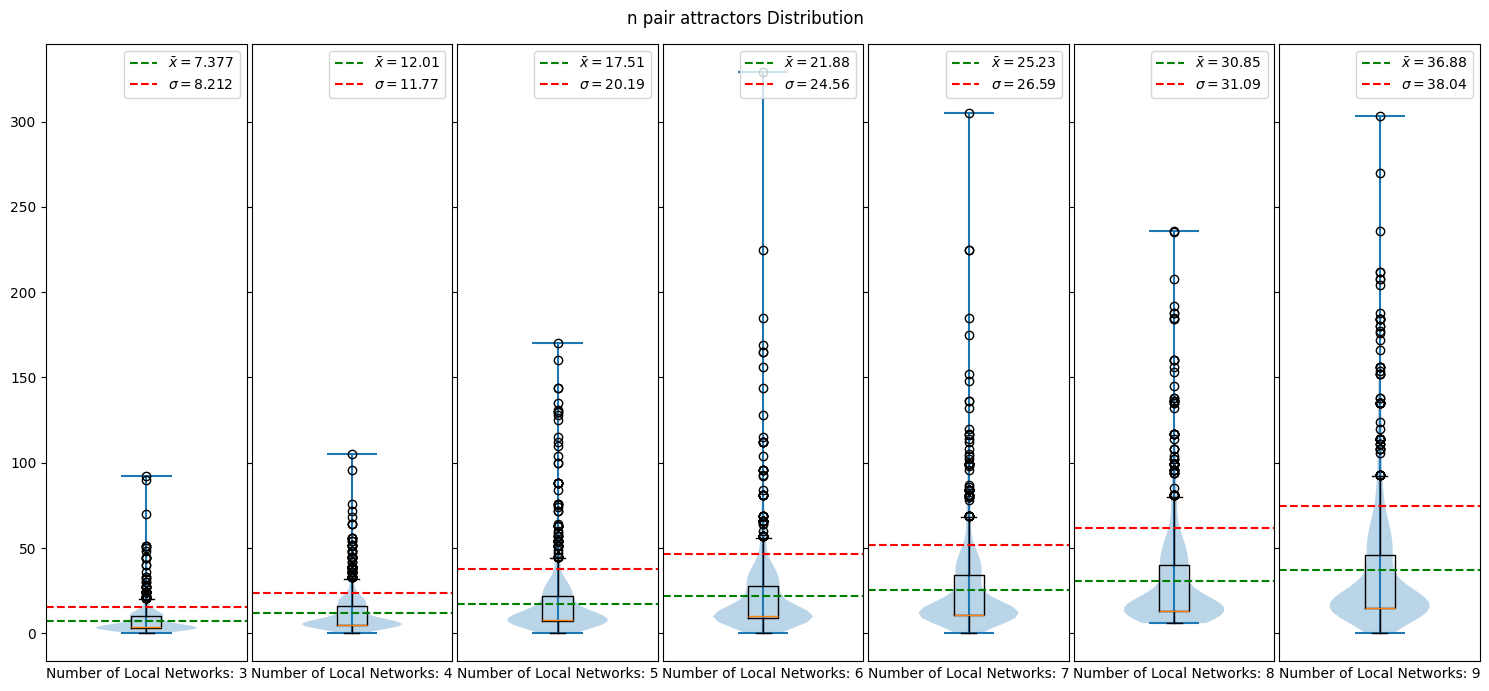

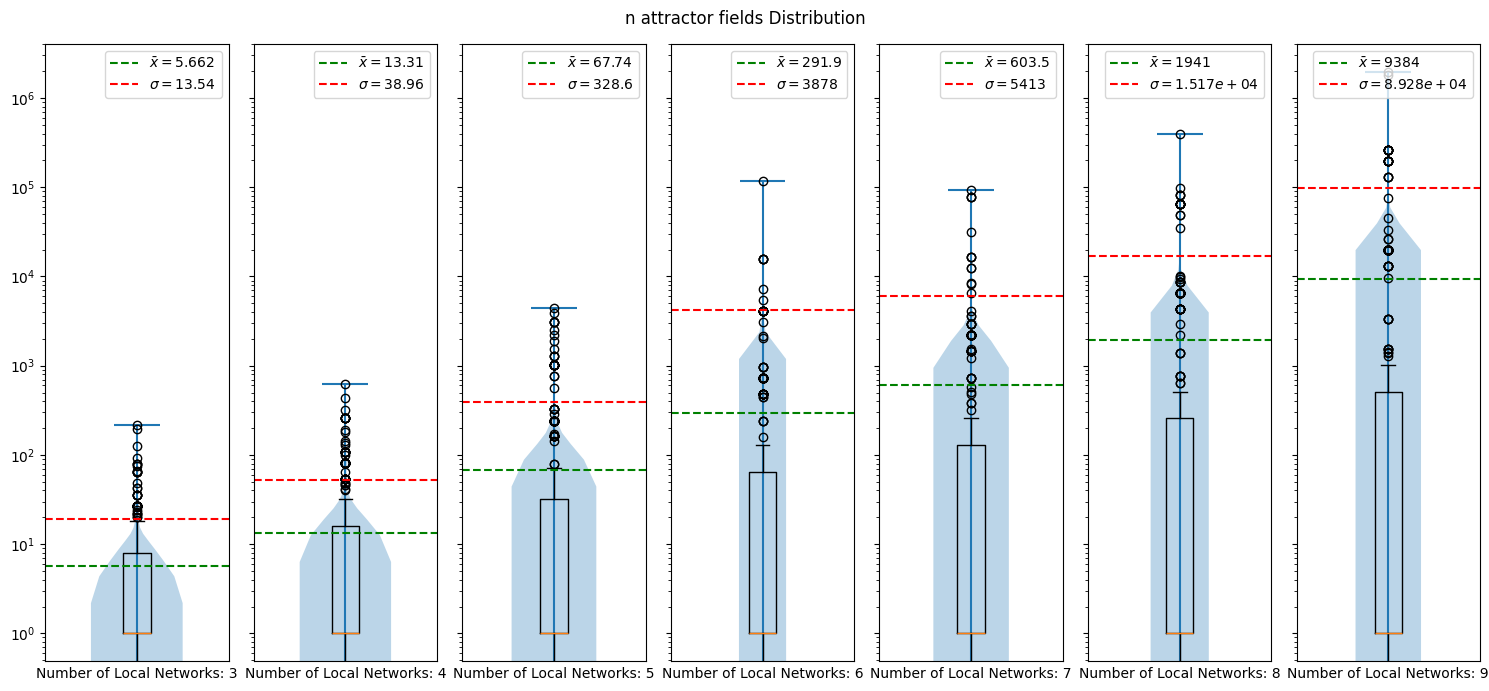

In [38]:
import matplotlib.pyplot as plt

df_local_networks_n = df

# Obtener los últimos tres valores únicos de n_local_networks
n_local_networks_unique = df_local_networks_n['n_local_networks'].unique()
n_local_networks_last_three = sorted(n_local_networks_unique)

# Violin graphs
attributes = ['n_local_attractors', 'n_pair_attractors', 'n_attractor_fields']

for attribute in attributes:
    fig, axs = plt.subplots(1, len(n_local_networks_last_three), sharey=True, figsize=(15, 7))

    for i, n_networks in enumerate(n_local_networks_last_three):
        data = df_local_networks_n[df_local_networks_n['n_local_networks'] == n_networks][attribute]

        axs[i].violinplot(data)
        axs[i].boxplot(data)
        axs[i].set_xlabel(f'Number of Local Networks: {n_networks}')
        axs[i].set_xticks([])
        axs[i].set_xlim((0.5, 1.5))

        mean = data.mean()
        std_dev = data.std()
        axs[i].axhline(mean, color='g', ls='--', label=fr'$\bar{{x}}={mean:.4g}$')
        axs[i].axhline(mean + std_dev, color='r', ls='--', label=fr'$\sigma={std_dev:.4g}$')
        axs[i].legend()

        if attribute == 'n_attractor_fields':  # Aplicar escala log solo en el último atributo
            axs[i].set_yscale('log')

    fig.suptitle(f'{attribute.replace("_", " ")} Distribution')
    fig.tight_layout(w_pad=0)

plt.show()



In [39]:
import pandas as pd
import numpy as np

# Seleccionar las columnas requeridas y crear el nuevo DataFrame
df_resume = df[['n_local_attractors', 'n_pair_attractors', 'n_attractor_fields']]

# Reemplazar los valores infinitos con NaN y eliminar las filas que contienen NaN
df_resume = df_resume.replace([np.inf, -np.inf], np.nan).dropna()

# Realizar un resumen estadístico
df_resume.describe()

,n_local_attractors,n_pair_attractors,n_attractor_fields
count,7000.000000,7000.000000,7.000000e+03
mean,16.025286,21.676571,1.758204e+03
std,9.205536,26.665255,3.445366e+04
min,5.000000,0.000000,0.000000e+00
25%,9.000000,7.000000,1.000000e+00
50%,14.000000,13.000000,1.000000e+00
75%,19.000000,23.000000,1.800000e+01
max,72.000000,329.000000,1.953125e+06


# Top 20

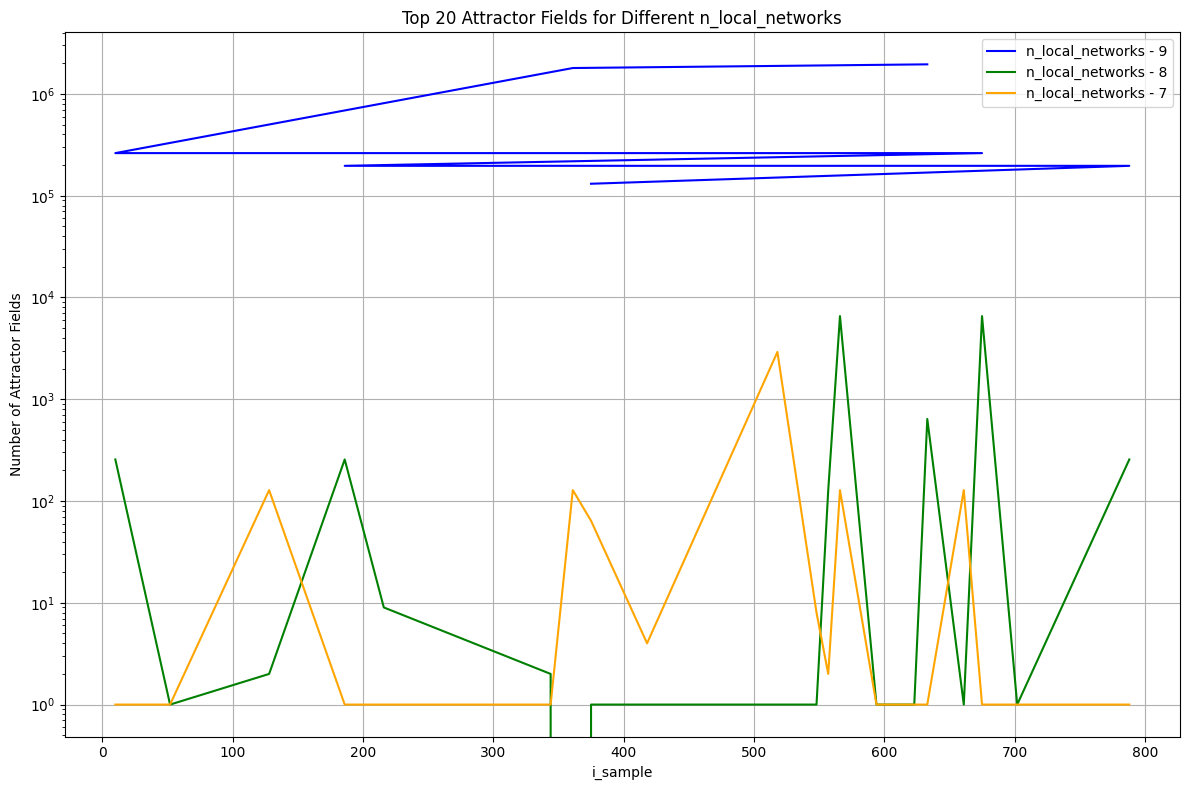

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# Suponiendo que tu DataFrame se llama df y contiene los datos necesarios

# Encontrar el valor máximo de n_local_networks
max_n_local_network = df['n_local_networks'].max()

# Seleccionar el top 20 de n_attractor_fields para el valor máximo de n_local_networks
top_20_max = df[df['n_local_networks'] == max_n_local_network].nlargest(20, 'n_attractor_fields')
i_sample_max = top_20_max['i_sample']

# Seleccionar los registros correspondientes a los i_sample obtenidos anteriormente pero para max_n_local_network - 1
selected_records_prev_1 = df[(df['n_local_networks'] == max_n_local_network - 1) & (df['i_sample'].isin(i_sample_max))]

# Seleccionar los registros correspondientes a los i_sample obtenidos anteriormente pero para max_n_local_network - 2
selected_records_prev_2 = df[(df['n_local_networks'] == max_n_local_network - 2) & (df['i_sample'].isin(i_sample_max))]

# Graficar los puntos correspondientes a cada lista
plt.figure(figsize=(12, 8))

# Graficar top 20 para max_n_local_network
plt.plot(top_20_max['i_sample'], top_20_max['n_attractor_fields'], color='blue', label=f'n_local_networks - {max_n_local_network}', linestyle='-')

# Graficar top 20 para max_n_local_network - 1
plt.plot(selected_records_prev_1['i_sample'], selected_records_prev_1['n_attractor_fields'], color='green', label=f'n_local_networks - {max_n_local_network - 1}', linestyle='-')

# Graficar top 20 para max_n_local_network - 2
plt.plot(selected_records_prev_2['i_sample'], selected_records_prev_2['n_attractor_fields'], color='orange', label=f'n_local_networks - {max_n_local_network - 2}', linestyle='-' )

plt.yscale('log')  # Escala logarítmica en el eje y
plt.xlabel('i_sample')
plt.ylabel('Number of Attractor Fields')
plt.title('Top 20 Attractor Fields for Different n_local_networks')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

